In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from time import time as time
t0 = time()

In [3]:
infile = open('/Volumes/NEXT_data/IC_Data/krThesis/sliding_window_events/variable_window_out_7479.txt', 'r')

In [4]:
data = infile.read()

In [5]:
events_window_maxX = eval(data[data.find('=')+1:data.find(']]')+2])
data = data[data.find(']]')+3:]

In [6]:
events_window_maxY = eval(data[data.find('=')+1:data.find(']]')+2])
data = data[data.find(']]')+3:]

In [7]:
events_window_rms = eval(data[data.find('=')+1:data.find(']]')+2])
data = data[data.find(']]')+3:]

In [8]:
events_window_width = eval(data[data.find('=')+1:data.find(']]')+2])
data = data[data.find(']]')+3:]

In [9]:
events_window_energy = eval(data[data.find('=')+1:data.find(']]')+2])
data = data[data.find(']]')+3:]

In [10]:
events_window_charge = eval(data[data.find('=')+1:data.find(']]')+2])
data = data[data.find(']]')+3:]

In [30]:
events_window_cut = [ [ 2 * (100 + i) * 25 for i in range(400)] for evt in events_window_width ]
events_window_energy_norm = [ [ peak / max(max(window_energy), 0.1) for peak in window_energy ] for window_energy in events_window_energy ]

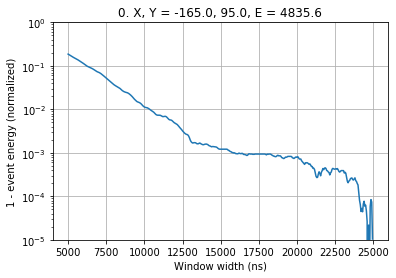

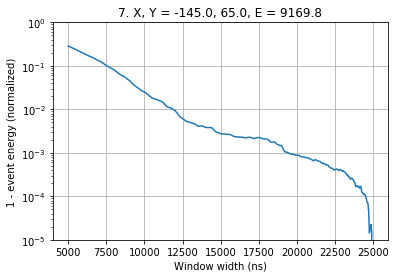

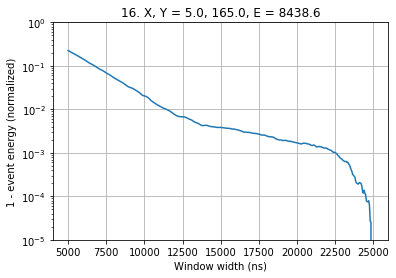

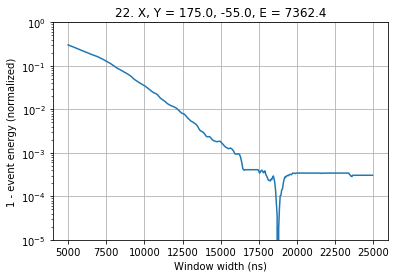

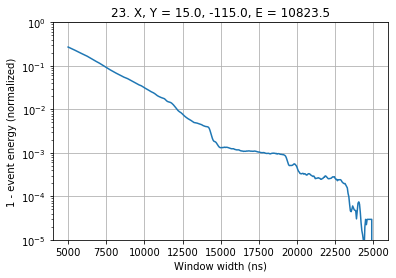

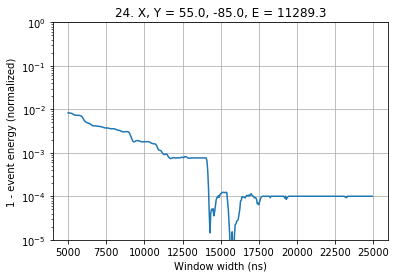

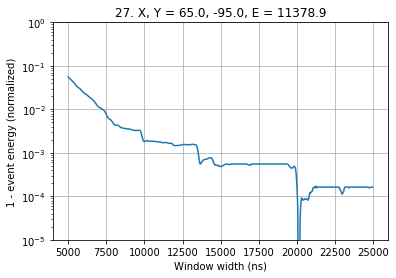

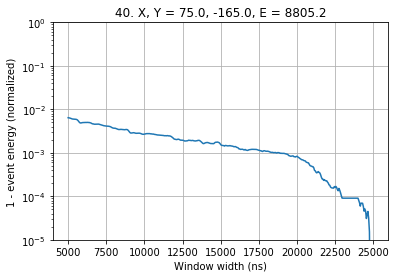

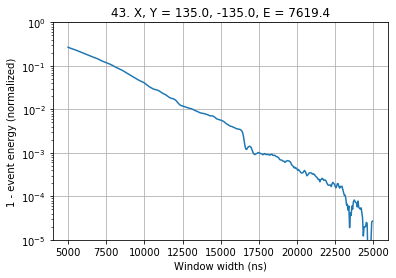

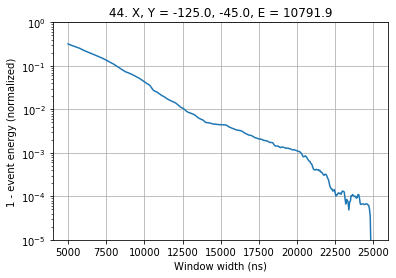

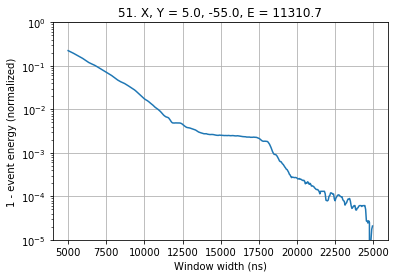

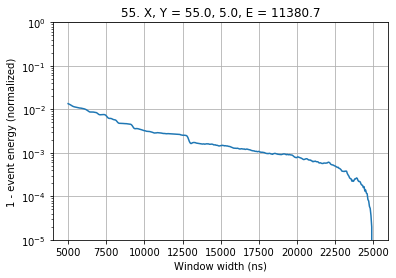

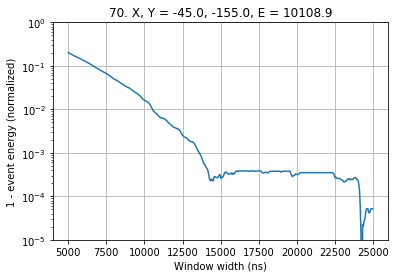

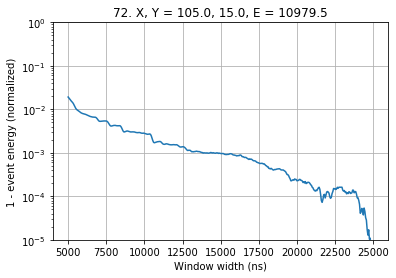

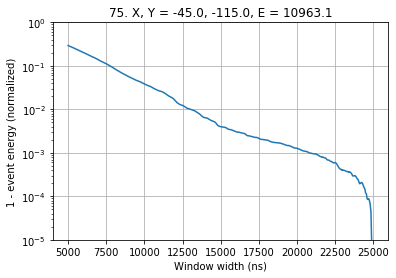

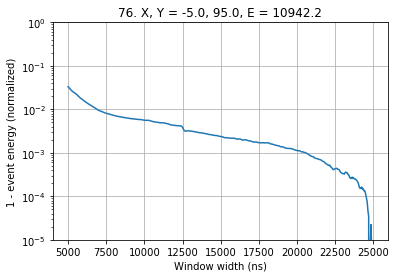

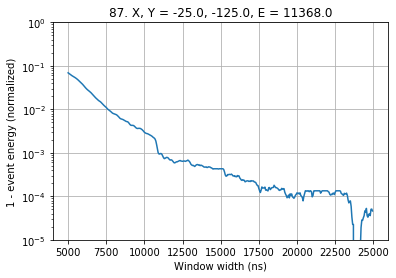

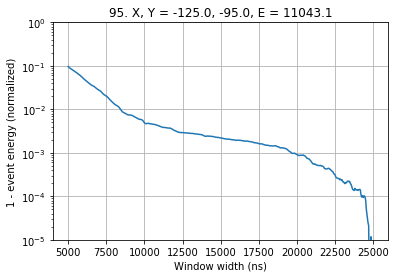

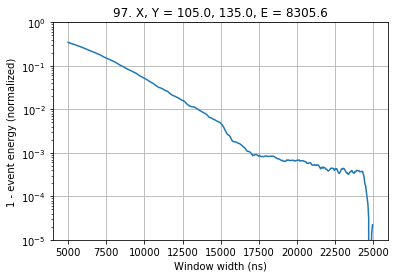

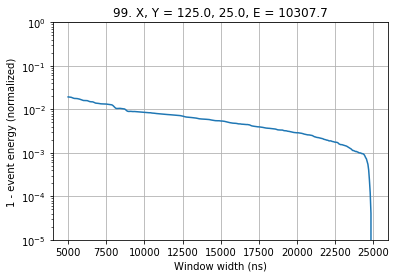

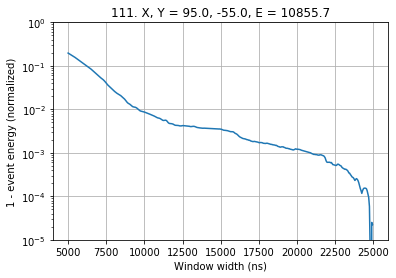

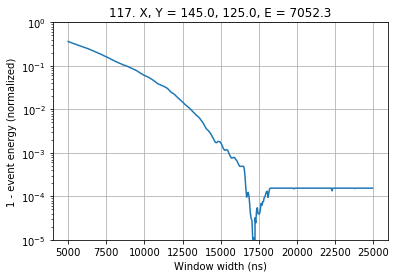

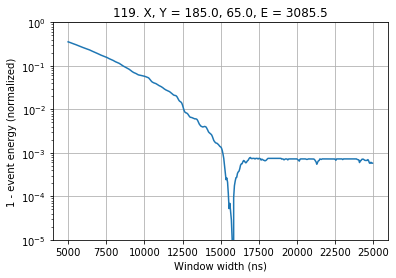

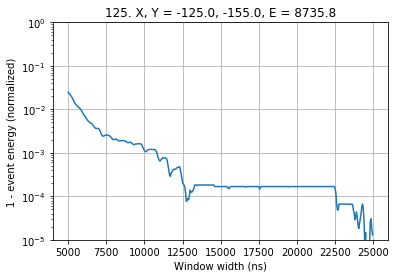

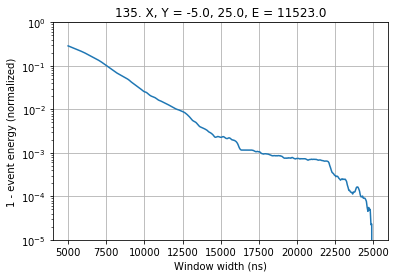

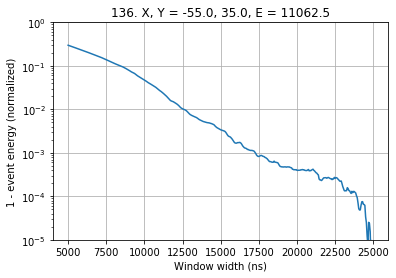

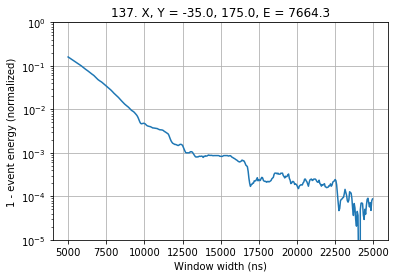

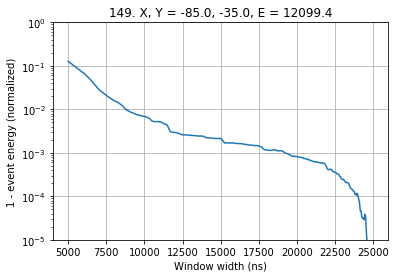

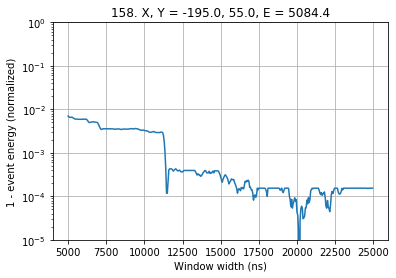

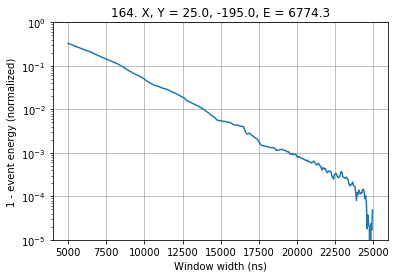

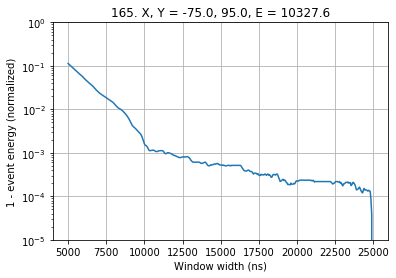

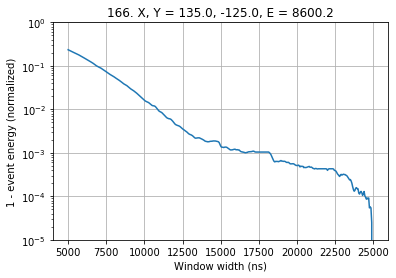

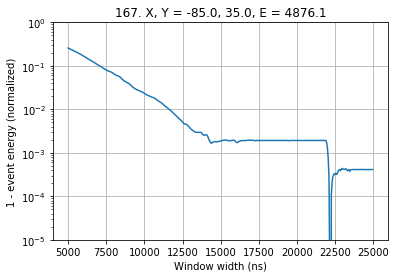

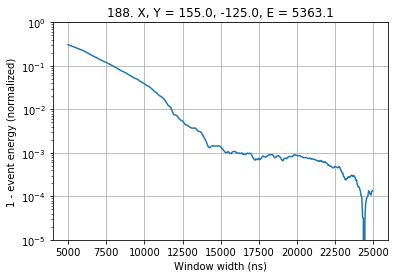

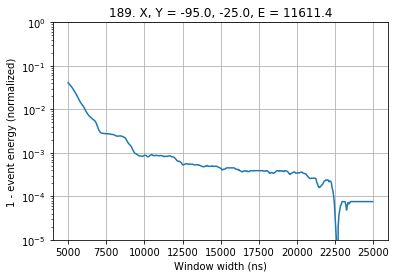

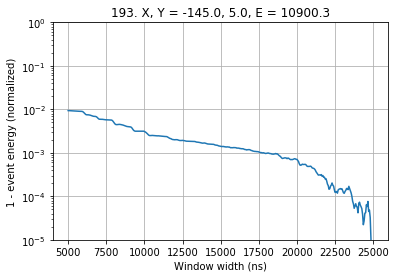

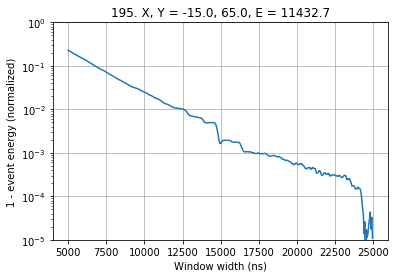

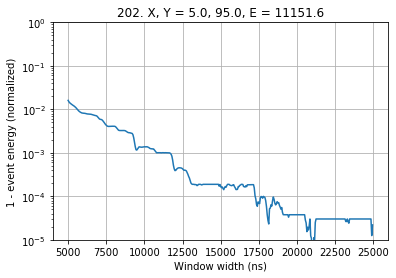

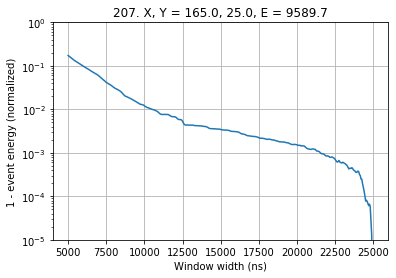

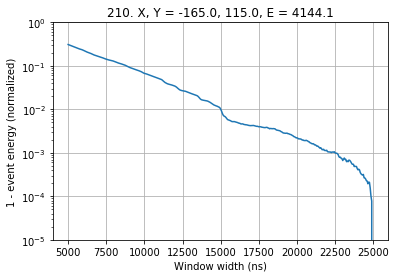

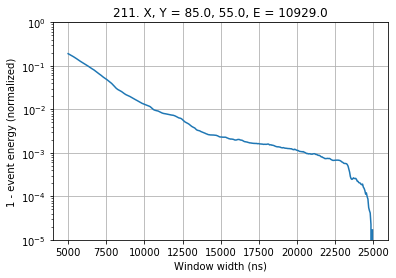

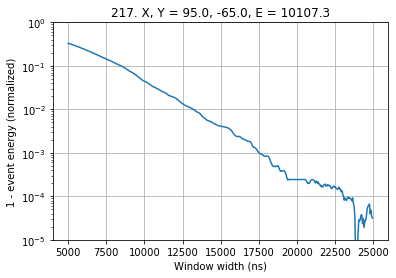

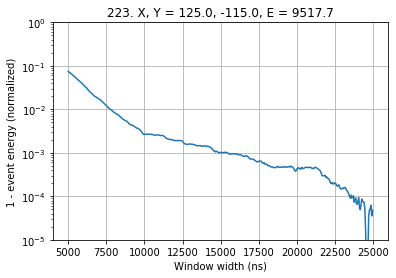

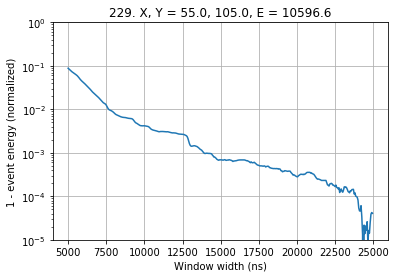

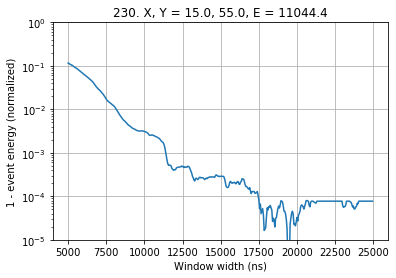

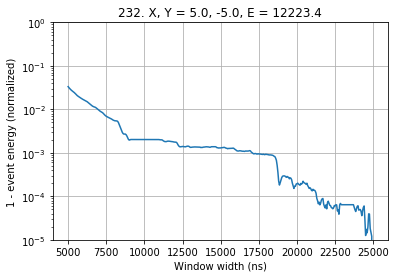

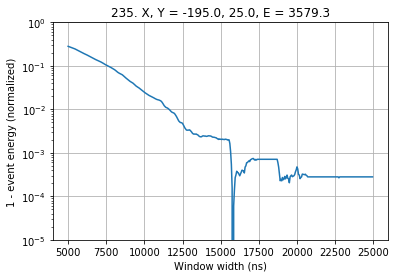

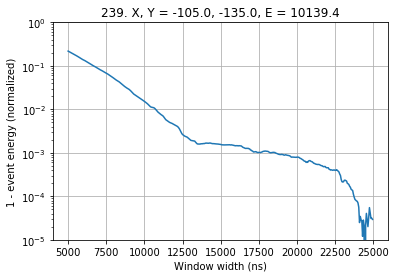

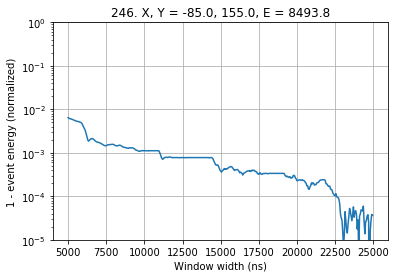

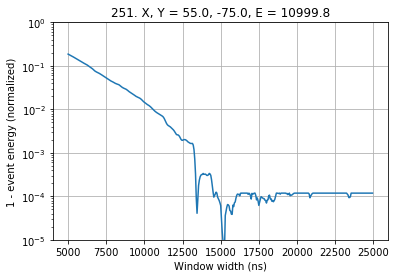

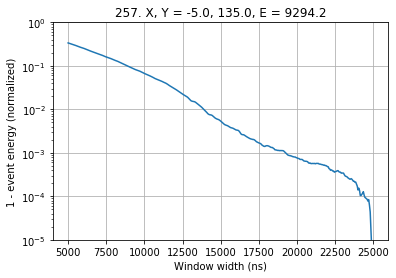

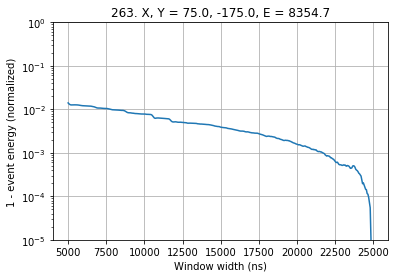

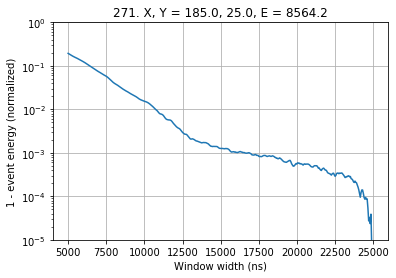

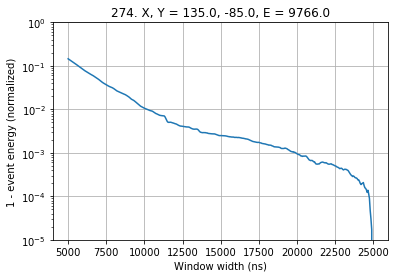

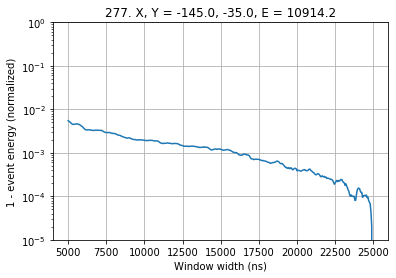

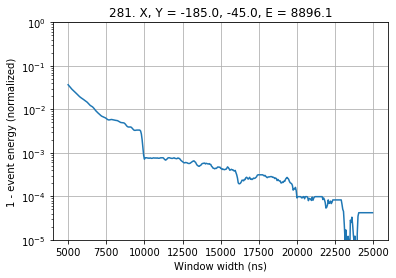

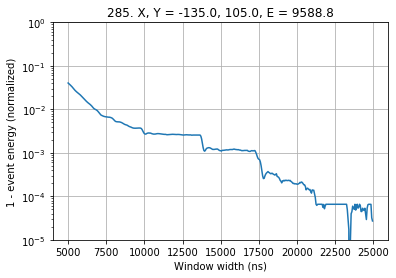

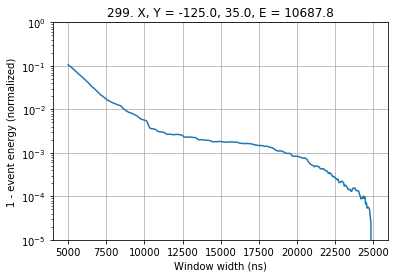

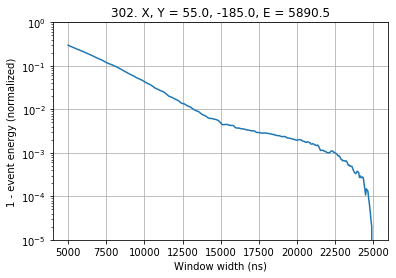

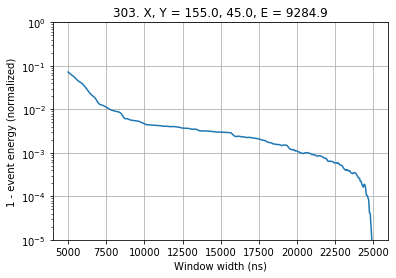

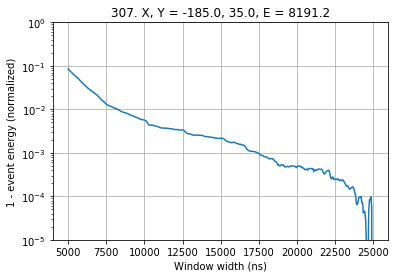

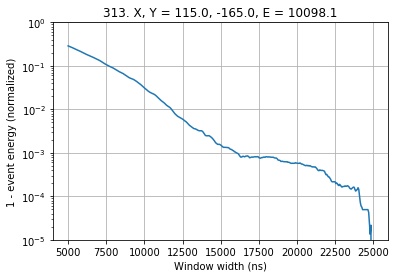

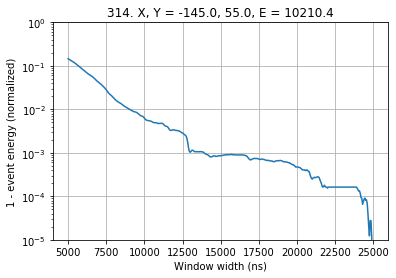

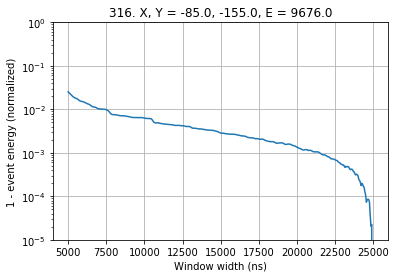

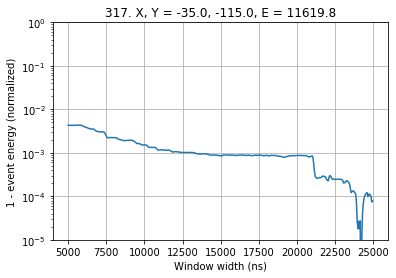

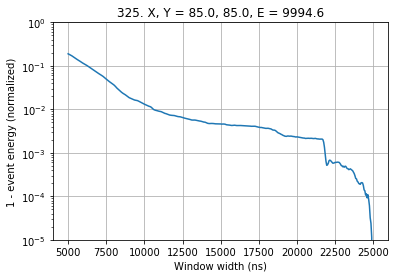

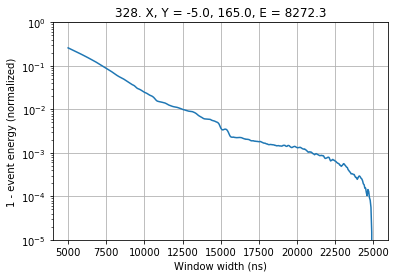

In [113]:
for i_evt in range(len(events_window_energy_norm)):
    X = events_window_maxX[i_evt][-1]
    Y = events_window_maxY[i_evt][-1]
    E = round(max(events_window_energy[i_evt]), 1)
    if E > 2000 and E < 15000:
        normed = np.array(events_window_energy_norm[i_evt])
        normed = 1 - normed
        plt.yscale('log')
        plt.ylim(10**-5,10**0)
        plt.title(str(i_evt)+'. X, Y = '+str(X)+', '+str(Y)+', E = '+str(E))
        plt.xlabel('Window width (ns)')
        plt.ylabel('1 - event energy (normalized)')
        plt.grid(True)
        plt.plot(events_window_cut[i_evt], normed)
        plt.show()

In [42]:
def exp_dt(sig):
    """
    expected drift distnce  as a function of sigma of the S2 signal (Zrms from kdst 2018 version)
    parameters from the ad-hoc fit
    """
    p = [-10.00667732,  52.1855012,   12.68195726,  58.66322846, -20.11819297]
    dt = p[0] * sig**4 + p[1] * sig**3 + p[2]*sig**2 + p[3]*sig + p[4]
    return dt

In [111]:
def dist_stdev(x, y):
    plt.plot(x, y)
    plt.show()
    dx = x[1:] - x[:len(x)-1]
    y_av = (1/2)*(y[1:] + y[:len(y)-1])
    y_int = np.sum(y_av * dx)
    y_norm = y_av / y_int
    x_av = (1/2)*(x[1:] + x[:len(y)-1])
    mean = np.sum(x_av*y_norm*dx) 
    print('Mean =', mean)
    stdev = np.sqrt(np.sum(dx*y_norm*(x_av - mean)**2))
    print('StDev =', stdev)

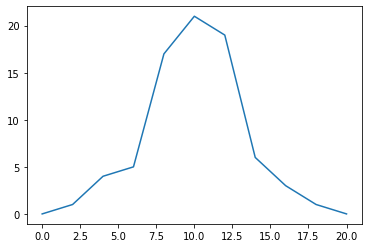

Mean = 10.025974025974024
StDev = 3.1765129373077943


In [112]:
x = np.array([0, 1, 2, 3,  4,  5, 6, 7, 8, 9, 10]) * 2
y = np.array([0, 1, 4, 5, 17, 21, 19, 6, 3, 1, 0])
dist_stdev(x, y)